# 2. **Derivation & Discretisation of Governing Equations**

[
    <svg style="color: rgb(53, 145, 243)" width="20" height="20"  viewBox="0 0 22 10" xmlns="http://www.w3.org/2000/svg"><g fill="currentColor" transform="translate(1 1)"><path d="m.5 9.5 9-9 9 9" fill="currentColor"></path><path d="m2.5 7.5v8c0 .5522847.44771525 1 1 1h3c.55228475 0 1-.4477153 1-1v-4c0-.5522847.44771525-1 1-1h2c.5522847 0 1 .4477153 1 1v4c0 .5522847.4477153 1 1 1h3c.5522847 0 1-.4477153 1-1v-8" fill="#3591f3"></path></g></svg>
](https://scottlevie97.github.io/pythonFVSolidMechanics)[<svg style="color: rgb(53, 145, 243);" xmlns="http://www.w3.org/2000/svg" width="16" height="16" fill="currentColor" class="bi bi-arrow-left-circle-fill" viewBox="0 0 16 16"> <path d="M8 0a8 8 0 1 0 0 16A8 8 0 0 0 8 0zm3.5 7.5a.5.5 0 0 1 0 1H5.707l2.147 2.146a.5.5 
0 0 1-.708.708l-3-3a.5.5 0 0 1 0-.708l3-3a.5.5 0 1 1 .708.708L5.707 7.5H11.5z" fill="#3591f3"></path> </svg> **Notebook 1** ](https://nbviewer.org/github/scottlevie97/pythonFVSolidMechanics/blob/new-release/lesson_notebooks/_01_Defining_Mesh.ipynb?flush_cache=true)
|
[**Notebook 3** <svg style="color: rgb(53, 145, 243);" xmlns="http://www.w3.org/2000/svg" width="16" height="16" fill="currentColor" class="bi bi-arrow-left-circle-fill" viewBox="0 0 16 16" transform="rotate(180)"> <path d="M8 0a8 8 0 1 0 0 16A8 8 0 0 0 8 0zm3.5 7.5a.5.5 0 0 1 0 1H5.707l2.147 2.146a.5.5 
0 0 1-.708.708l-3-3a.5.5 0 0 1 0-.708l3-3a.5.5 0 1 1 .708.708L5.707 7.5H11.5z" fill="#3591f3"></path> </svg>](https://nbviewer.org/github/scottlevie97/pythonFVSolidMechanics/blob/new-release/lesson_notebooks/_03_Internal_Cells.ipynb?flush_cache=true)

***

As mentioned previously, the behaviour of each computational cell will be described by governing equations. Each cell within the mesh will be treated as a Control Volume (CV).

The governing equation for each cell is:

- **Conservation of linear momentum**: The sum of the forces acting on the cell will be equal to the change in momentum of the cell.


## Conservation of Linear Momentum

In order for momentum to be conserved the total change of momentum of the solid must be equal to the sum of the forces $F$ acting on it:

$$ m \boldsymbol{a} = \sum F $$

where $m$ is the mass of the solid and $\boldsymbol{a}$ is the acceleration of the solid. Acceleration $a$ is second derivative of displacement $U$ with respect to time $t$, therefore:

$$ m \frac{\partial^2 \boldsymbol{U}}{\partial t^2} = \sum F $$

Integrating over the control volume we get:

$$ \int_{V} \rho \frac{\partial^2 \boldsymbol{U}}{\partial t^2} \, dV =  \sum F $$

where $\rho$ is the density of the material and $V$ is the volume of the control volume.


### Forces acting on the control volume

There are two forces that act on the control volume:

1. Forces due to internal stresses $\rightarrow$ **traction**
2. Forces that act throughout the whole material $\rightarrow$ **body forces**

The final version of the momentum equation will take the form:

$$
\int_{V} \rho \frac{\partial^2 \boldsymbol{U}}{\partial t^2} \, dV =
\underbrace{F_{\textrm{traction}}}_{\textrm{total traction force}}
+ 
\underbrace{F_{\textrm{body}}}_{\textrm{total body force}}
$$

#### Traction

The traction forces act on the surfaces that bound the control volume. They are caused due to internal stress within the control volume. The traction force $t$, is described as the dot product of the outward facing normal vector $\boldsymbol{\hat{n}}$ and the Cauchy stress tensor $\boldsymbol{\sigma}$.

$$
\boldsymbol{t} =  \hat{\boldsymbol{n}} \cdot \boldsymbol{\sigma}
$$

the hat operator on $\hat{\boldsymbol{n}}$ mean the unit vector of vector $\boldsymbol{n}$.

To further explain why this is, we need to inspect the concept of **stress** more closely:

##### Stress

Stress throughout a 3 dimensional domain is a 2nd order tensor field, i.e, it requires 9 values to describe its properties (a vector requires 3) at a given point within the field.

<center><img src="images/2/Stress_Images/all_planes_sigma.png" alt="Drawing" style="width: 500px;"/></center> 

The stress tensor at a point within field can be given in matrix form:

$$
\boldsymbol{\sigma}
=
\begin{bmatrix}
\sigma_{xx} & \sigma_{xy} & \sigma_{xz} \\ 
\sigma_{yx} & \sigma_{yy} & \sigma_{yz} \\
\sigma_{zx} & \sigma_{zy} & \sigma_{zz}
\end{bmatrix}
$$

For each plane there is one normal stress and two shear stresses:

- Normal stress acts perpendicular to the area in question
- Shear stress acts parallel to the area in question.

This is notated using subscripts:

$$ \sigma_{ij} $$

where: $i \rightarrow$ orientation of surface
$j \rightarrow$ direction of force

The convention also states that the rows of the tensor matrix should all have the same plane/area and the columns should have the same force direction.

- Rows $\rightarrow$ same plane
- Coloumns $\rightarrow$ same force direction

$$
\begin{align*}
\boldsymbol{\sigma}
=
&
\begin{bmatrix}
\sigma_{xx} & \sigma_{xy} & \sigma_{xz} \\
\sigma_{yx} & \sigma_{yy} & \sigma_{yz} \\
\sigma_{zx} & \sigma_{zy} & \sigma_{zz}
\end{bmatrix}
\begin{matrix}
\rightarrow x \textrm{-plane}\\
\rightarrow y \textrm{-plane}\\
\rightarrow z \textrm{-plane}
\end{matrix}
\\
&
\begin{matrix}
\space \space \space \space \space
\downarrow &
\space \space \space \space
\downarrow &
\space \space \space \space
\downarrow
\end{matrix}
\\
&
\begin{matrix}
\space \space \space \space \space
F_x
&
\space
F_y
&
\space
F_z
\end{matrix}
\end{align*}
$$

<p float="center">
<img src="images/2/Stress_Images/x_sgima.png" alt="Drawing" style="width: 300px;"/>
<img src="images/2/Stress_Images/y_sigma.png" alt="Drawing" style="width: 300px;"/>
<img src="images/2/Stress_Images/z_sigma.png" alt="Drawing" style="width: 300px;"/>
</p>

Taking the dot product of a normal vector $\boldsymbol{\hat{n}}$ and a stress tensor $\sigma$ will give you the traction vector for the plane with the normal $\boldsymbol{\hat{n}}$. So, if you take the dot product of the normal of one of the planes above ($x$, $y$, or $z$) and the stress tensor, if will give you the traction vector acting on that plane.

Let's test this:

If the plane of interest has a unit normal $\boldsymbol{\hat{n}}$ of $[1, 0, 0]$, the traction vector is calculated as:

$$
\begin{align*}

\boldsymbol{\hat{n}} \cdot \boldsymbol{\sigma}
  & =
\begin{bmatrix}
1 & 0 & 0
\end{bmatrix}
\cdot
\begin{bmatrix}
\sigma_{xx} & \sigma_{xy} & \sigma_{xz} \\
\sigma_{yx} & \sigma_{yy} & \sigma_{yz} \\
\sigma_{zx} & \sigma_{zy} & \sigma_{zz}
\end{bmatrix}
\\
& =
\begin{bmatrix}
\sigma_{xx} & \sigma_{xy} & \sigma_{xz}
\end{bmatrix}
\end{align*}
$$

which are the 3 stress components acting on the $x$-plane.


##### Surface Integral

Returning to the total traction force term in the momentum equation: 

$$
\int_{V} \rho \frac{\partial^2 \boldsymbol{U}}{\partial t^2} \, dV =
{\color{orange}{\boxed{{F_{\textrm{traction}}}}}}
+ 
{F_{\textrm{total body force}}}
$$

we need to describe this is term of the traction vector on the cell faces. 

The total traction force acting on a face $f$ of the control volume is the integral of the traction vectors over the face area $S_f$:


$$
\begin{align*}
\textrm{traction force on a face} & = \int_{S_f} \boldsymbol{t} \, dS_f  \\

& = \int_{S_f} \hat{\boldsymbol{n}} \cdot \boldsymbol{\sigma} \, dS_f 
\end{align*}
$$

The total force acting on the control volume is the sum of these forces across all faces:

$$
\begin{align*}
\textrm{total traction forces} & = \sum_{f=1}^{nFaces} \int_{S_f} \hat{\boldsymbol{n}} \cdot \boldsymbol{\sigma}_f \, dS_f  \\


F_{\textrm{traction}} & = \sum_{f=1}^{nFaces} \int_{S_f} \hat{\boldsymbol{n}} \cdot \boldsymbol{\sigma}_f \, dS_f  \\

\end{align*}

$$

This can also be written as the closed surface integral over the cell:

$$
F_{\textrm{traction}} =  \oint_S \hat{\boldsymbol{n}} \cdot \boldsymbol{\sigma} \, dS
$$




#### Body Forces

A body force is a force that acts throughout a material or "body". 

$$
\int_{V} \rho \frac{\partial^2 \boldsymbol{U}}{\partial t^2} \, dV =
{F_{\textrm{traction}}}
+ 
{\color{orange}{\boxed{{F_{\textrm{total body force}}}}}}
$$

Common examples are forces due to gravity, electric fields or magnetic fields. For a body force that is constant throughout a domain, the acceleration due to this force is donated $b$:

$$
F_{body} = mb
$$

In volume integral form:

$$ F_{body} = \int_V \rho \boldsymbol{b} \, dV $$

### Final Integral Form of Momentum Equation

Putting together the temporal term (LHS) and the two force terms (RHS) we have the final integral form of the conservation of linear momentum equation:

$$
\begin{align*}
m \boldsymbol{a} 
& =
 \sum F
\\
m \boldsymbol{a}  
& =
F_{\textrm{traction}} + F_{\textrm{body}}
\\
\int_{V} \rho \frac{\partial^2 \boldsymbol{U}}{\partial t^2} \, dV 
& =
\oint_S \hat{\boldsymbol{n}} \cdot \boldsymbol{\sigma} \, dS + \int_V \rho \boldsymbol{b} \, dV
\end{align*}
$$

## Discretisation

Discretisation of the governing equations is essentially how we "break up" the continuous function that is the momentum equation. In other words, how we will take the temporal term and forces terms and express them in terms of variables at discrete locations. The terms in the momentum equation will be labelled as follows: 

$$
\underbrace{\int_{V} \rho \frac{\partial^2 \boldsymbol{U}}{\partial t^2} \, dV}_{\textrm{temporal terms}}
 =
\underbrace{\oint_S \hat{\boldsymbol{n}} \cdot \boldsymbol{\sigma} \, dS + \int_V \rho \boldsymbol{b} \, dV}_{\textrm{force term}}
$$

### Temporal Term Discretisation

The temporal term is the volume integral of the second derivate of displacement with respect to time: 

$$
\underbrace{\int_{V} \rho \frac{\partial^2 \boldsymbol{U}}{\partial t^2} \, dV}_{\textrm{temporal term}}
$$

#### Second Derivative of Displacement

In order to express the second temporal derivative of displacement:

$$ \frac{\partial^2 \boldsymbol{U}}{\partial t^2}$$
into discrete values, we need to discretise time $t$ into finite amounts $\Delta t$. These finite amounts are called time-steps. 

In order to discretise the acceleration of the control volume, i.e. the temporal term we will use information from previous time-steps.

For acceleration $a$ and velocity $v$ we know that:

$$
\boldsymbol{a} = \frac{\partial \boldsymbol{v}}{\partial t} = \frac{\partial^2 \boldsymbol{U}}{\partial t^2}
$$

We can discretise acceleration by saying it is the difference in velocity at the new time-step $V^n$ and the velocity at the old time-step $V^o$ divided by $\Delta t$

$$
\boldsymbol{a}
= 
\frac{V^n - V^o}{\Delta t}
$$

Using the same method we can discretise velocity as the difference in displacement $U$ over change in time $\Delta t$:

$$
\boldsymbol{v}
= 
\frac{\boldsymbol{U}^n - \boldsymbol{U}^o}{\Delta t}
$$

In the acceleration term we need to discretise both $V^n$ and $V^o$

$$
\boldsymbol{V^n}
= 
\frac{\boldsymbol{U}^n - \boldsymbol{U}^o}{\Delta t}
,
\space \space \space 
\boldsymbol{V^o}
= 
\frac{\boldsymbol{U}^o - \boldsymbol{U}^{oo}}{\Delta t}
$$

Subbing all this into the acceleration discretisation we get;


$$
\begin{align*}
\boldsymbol{a}
= &
\frac{\frac{\boldsymbol{U}^n - \boldsymbol{U}^o}{\Delta t} - \frac{\boldsymbol{U}^o - \boldsymbol{U}^{oo}}{\Delta t}}{\Delta t}
\\
\boldsymbol{a}
= &
\frac{\boldsymbol{U}^n - 2\boldsymbol{U}^o + \boldsymbol{\boldsymbol{U}^{oo}}}{{\Delta t}^2}
\\
\frac{\partial^2 \boldsymbol{U}}{\partial t^2}
= &
\frac{\boldsymbol{U}^n - 2\boldsymbol{U}^o + \boldsymbol{\boldsymbol{U}^{oo}}}{{\Delta t}^2}
\end{align*}
$$

Essentially we've approximated what the acceleration of the control volume at time-step $n$ will be based on the displacement at the current time-step $n$ and the two previous time-steps $o$ & $oo$  

$n$ = new, $o$ = old, $oo$ = old, old

This discretisation method is known as the first-order backward Euler method. More information can be found [here](https://math.libretexts.org/Bookshelves/Differential_Equations/Numerically_Solving_Ordinary_Differential_Equations_(Brorson)/01%3A_Chapters/1.03%3A_Backward_Euler_method).

#### Volume Integral

Returning to our volume integral, we can separate it into three integrals over the displacements from different time-steps:

$$
\begin{align*} 
\rho \int_V \frac{\partial^2 \boldsymbol{U}}{\partial t^2} \, dV  
=&  \rho \int_V \frac{\boldsymbol{U}^n - 2\boldsymbol{U}^o + \boldsymbol{U}^{oo}}{\Delta t^2} \, dV 
\\
=&  \frac{\rho}{\Delta t^2} \left( \int_V \boldsymbol{U}^n \, dV -2\int_V \boldsymbol{U}^o \, dV + \int_V \boldsymbol{U}^{oo} \, dV \right) 
\end{align*}
$$

this is assuming density $\rho$ is constant throughout the field.  

To discretise these volume integrals we need to make certain assumptions about the spatial variation of variables within this term:



##### Spatial Variation
Spatial variation is a key assumption in the finite volume method. It stems from the definition of the centroid rule; where for a volume $V$ the centroid of said volume $\boldsymbol{\textrm{x}}_P$ is given by the equation:

$$
\int_{V} (\boldsymbol{\textrm{x}} - \boldsymbol{\textrm{x}}_P) \, dV = 0
$$

where $\boldsymbol{\textrm{x}}$ is the coordinate vector.

<!-- ** try explain this with moments?: The centroid is the location within a volume of constant density where the total moments are zero ** -->

The spatial variation for our solver assumes that all intensive properties $\phi$ vary linearly within the control volume with distance from the centroid. 

This raises some questions:

1. **What is an intensive property?** They are properties that are independent of the amount of matter within a system. Examples are density (mass per volume) and velocity (momentum per unit mass). 

2. **What does varying linearly mean?** This means that the change of intensive property from the value at the centroid will be directly proportional to the distance from the centroid:

$$
\phi_x - \phi_P ∝ \boldsymbol{\textrm{x}} - \boldsymbol{\textrm{x}}_P 
$$

or concretely: 

$$
\phi_x - \phi_P = k(\boldsymbol{\textrm{x}} - \boldsymbol{\textrm{x}}_P)
$$

where $k$ is some constant value, which will be denoted as:  

$$ 
k = \frac{\phi_x - \phi_P }{\boldsymbol{\textrm{x}} - \boldsymbol{\textrm{x}}_P} = \frac{\partial \phi}{\partial \boldsymbol{\textrm{x}}} 
$$

The intensive property at a coordinate $x$, $\phi_x$ can be given in terms of $\phi_P$, the spatial difference between the point on the centroid $x - \boldsymbol{\textrm{x}}_P$ and an assumed constant linear variation coefficient $\frac{\partial\phi}{\partial \boldsymbol{\textrm{x}}}$:

$$
\phi_x = \phi_P +  ({\boldsymbol{\textrm{x}} - \boldsymbol{\textrm{x}}_P})\frac{\partial \phi}{\partial \boldsymbol{\textrm{x}}} 
$$

For more information see [H. Jasak, 1996, PhD, Error Analysis and Estimation for the Finite Volume Method with Applications to Fluid Flows](https://spiral.imperial.ac.uk/bitstream/10044/1/8335/1/Hrvoje_Jasak-1996-PhD-Thesis.pdf)

Returning to the volume integral:

$$ \int_V \boldsymbol{U}\, dV $$

using the spatial differencing assumption where $\boldsymbol{U}$ is the intensive property $\phi$:

$$
\boldsymbol{U} = \boldsymbol{U}_P +  (\boldsymbol{\textrm{x}} - \boldsymbol{\textrm{x}}_P)\frac{\partial U}{\partial \boldsymbol{\textrm{x}}} 
$$

subbing into the volume integral:

$$ 
\begin{align*}
\int_V \boldsymbol{U}\, dV  & =   \int_V \left[ \boldsymbol{U}_P +  (\boldsymbol{\textrm{x}} - \boldsymbol{\textrm{x}}_P)\frac{\partial U}{\partial \boldsymbol{\textrm{x}}} \right]\, dV
\\
& = \boldsymbol{U}_P \int_V \, dV + \frac{\partial U}{\partial \boldsymbol{\textrm{x}}}\underbrace{\int_V (\boldsymbol{\textrm{x}} - \boldsymbol{\textrm{x}}_P)\, dV }_{=0}
\\
& =  \boldsymbol{U}_P V
\end{align*}
$$



Conceptually this says that the integral or sum of all displacement vectors $\boldsymbol{U}$ over a surface is equivalent to the displacement vector at the centroid $P$ times the scalar cell Volume $V$

$$ \int_V \boldsymbol{U}\, dV = \boldsymbol{U}_P \int_V \, dV = \boldsymbol{U}_P V$$


<center><img src="images/2/spatial_variation.png" alt="Drawing" style="width: 700px;"/></center>


#### Final form of Temporal term:

The final discretised form of the temporal term becomes:

$$
\begin{align*} 
\rho \int_V \frac{\partial^2 \boldsymbol{U}}{\partial t^2} \, dV  
=&    \frac{\rho}{\Delta t^2} \left( \int_V \boldsymbol{U}^n \, dV -2\int_V \boldsymbol{U}^o \, dV + \int_V \boldsymbol{U}^{oo} \, dV \right) 
\\
=&  \frac{\rho}{\Delta t^2} \left( \boldsymbol{U}^n V^n -2 \boldsymbol{U}^o V^o + \boldsymbol{U}^{oo}  V^{oo} \right)
\end{align*}
$$

Note that above the subscripts for timesteps of the cell volume $V$. If our mesh moved from time-step to time-step we would use the volume from each timestep. However, the volume of the mesh for this solver remains constant. 

### Force Term Discretisation

The discretisation of the momentum equation force terms will be broken into traction force terms and body force terms:

$$
\underbrace{\int_{V} \rho \frac{\partial^2 \boldsymbol{U}}{\partial t^2} \, dV}_{\textrm{temporal term}}
 =
\underbrace{\oint_S \hat{\boldsymbol{n}} \cdot \boldsymbol{\sigma} \, dS}_{\textrm{traction force}} + \underbrace{\int_V \rho \boldsymbol{b} \, dV}_{\textrm{body force}}
$$


#### Traction term:

The traction term is a closed surface integral of the dot product of the outward-facing normal vector $\hat{\boldsymbol{n}}$ and the stress tensor $\boldsymbol{\sigma}$. This is equivalent to the sum of the total traction forces on each cell face:

$$
\oint_S  \hat{\boldsymbol{n}} \cdot \boldsymbol{\sigma} \, dS  = \sum_{f=1}^{nFaces} \int_{S_f}  \hat{\boldsymbol{n}}  \cdot \boldsymbol{\sigma}_f \, dS_f 
$$

this integral means the sum of the traction vector ${\boldsymbol{n}}  \cdot \boldsymbol{\sigma}_f$ at every point on a face $f$. Similarly to the volume integral in the temporal term, we will need to make some assumptions about the spatial variation of traction around the centroid of each face.

#### Spatial Variation

The equation for the centroid of a surface is the same as a volume (except we are integrating over one less dimension). Subscript $P_f$ represents the centroid $P$ of a face $f$:

$$
\int_{S} (\boldsymbol{\textrm{x}} - \boldsymbol{\textrm{x}}_{P_f}) \, dS = 0 
$$

Subbing traction $ \hat{\boldsymbol{n}}  \cdot \boldsymbol{\sigma}$ as the intensive property $\phi$ in the spatial variation equation: 

$$
\phi_x = \phi_P +  ({\boldsymbol{\textrm{x}} - \boldsymbol{\textrm{x}}_{P_f}})\frac{\partial\phi}{\partial \boldsymbol{\textrm{x}}} 
$$

we get:

$$
\begin{align*}

\int_{S_f}  \hat{\boldsymbol{n}}  \cdot \boldsymbol{\sigma}_f \, dS_f & =

\int_{S_f}
\left[ 
\hat{\boldsymbol{n}}  \cdot \boldsymbol{\sigma}_{P_f} 
+
({\boldsymbol{\textrm{x}} - \boldsymbol{\textrm{x}}_{P_f}})\frac{\partial (\hat{\boldsymbol{n}}  \cdot \boldsymbol{\sigma}_f)}{\partial \boldsymbol{\textrm{x}}} 
\right]\, dS_f
\\
& = 
\hat{\boldsymbol{n}}  \cdot \boldsymbol{\sigma}_{P_f} \int_{S_f} \, dS_f
+ 
\frac{\partial (\hat{\boldsymbol{n}}  \cdot \boldsymbol{\sigma}_f)}{\partial \boldsymbol{\textrm{x}}} 
\underbrace{\int_{S_f} ({\boldsymbol{\textrm{x}} - \boldsymbol{\textrm{x}}_{P_f}})  \, dS_f}_{\textrm{=0
}}
\\
& = 
\hat{\boldsymbol{n}}  \cdot \boldsymbol{\sigma}_{P_f} S_f
\end{align*}
$$



Conceptually this says that the integral or sum of all traction vectors over a surface is equivalent to the traction vector at the centroid $P$ times the scalar surface area $S_f$

<center><img src="images/2/face_spatial_variation.png" alt="Drawing" style="width: 500px;"/></center>

$$
\int_{S_f} \hat{\boldsymbol{n}}  \cdot \boldsymbol{\sigma}_f \, dS_f = \hat{\boldsymbol{n}}  \cdot \boldsymbol{\sigma}_P S_f
$$

as $S_f$ is a scalar, the normal vector $\hat{\boldsymbol{n}}$ times the surface area becomes the surface area vector $\boldsymbol{S_f}$:

$$
\hat{\boldsymbol{n}}  \cdot \boldsymbol{\sigma}_{P_f}  S_f
=
{\boldsymbol{S_f}}  \cdot \boldsymbol{\sigma}_{P_f}  
$$

The surface area vectors for a structured mesh are shown below: 

<center><img src="images/2/SurfaceAreaVectors.png" alt="Drawing" style="width: 400px;"/></center>




##### Final form of traction term:

$$
\sum_{f=1}^{nFaces} {\boldsymbol{S_f}}  \cdot \boldsymbol{\sigma}_{P_f}  
$$

#### Body force term:

The discretisation of this term is much simpler. The body force that will be experienced in our solver will be gravity. The acceleration due to the body force $\boldsymbol{b}$ in the term:

$$
\int_V \rho \boldsymbol{b} \, dV
$$

will be constant throughout the domain. The density scalar field $\rho$ is also constant throughout the domain. Therefore:


$$
\begin{align*}
\int_V \rho \boldsymbol{b} \, dV 
& = 
\rho \boldsymbol{b} \int_V \, dV 
\\
& =
\rho \boldsymbol{b} V
\end{align*}
$$

The body force term is relatively easy to implement as it is constant for each cell in the mesh. For the purpose of these notebooks, it will be ignored. However, it will be implemented in the accompanying standalone solver.

### Final form of Momentum equation:

Now that each term is semi-discretised we can combine them to form the momentum equation:

$$
\frac{\rho}{\Delta t^2} \left( \boldsymbol{U}^n V^n -2 \boldsymbol{U}^o V^o + \boldsymbol{U}^{oo}  V^{oo} \right)
= 
\sum_{f=1}^{nFaces} {\boldsymbol{S_f}}  \cdot \boldsymbol{\sigma}_{P_f}  
+ 
\rho \boldsymbol{b} V
$$

As we are assuming linear elastic geometry (small strain/small rotation) the geometry of each cell does not change with time. Therefore: $V^n = V^o = V^{oo}$

$$
\frac{\rho}{\Delta t^2} \left( \boldsymbol{U}^n V -2 \boldsymbol{U}^o V + \boldsymbol{U}^{oo}  V \right)
= 
\sum_{f=1}^{nFaces} {\boldsymbol{S_f}}  \cdot \boldsymbol{\sigma}_{P_f}  
+ 
\rho \boldsymbol{b} V
$$



### Linear Elastic Law

For linear elastic materials the (Cauchy) stress tensor $\boldsymbol{\sigma}$ is given by the Linear Elastic Consitutive Law:

$$ \boldsymbol{\sigma} = 2 \mu \boldsymbol{\epsilon} + \lambda \textrm{tr}(\boldsymbol{\epsilon})I $$

where $\mu$ is the Shear Modulus and $\lambda$ is the Lame Modulus.

$$ \boldsymbol{\epsilon} = \textrm{symm}(\boldsymbol{U}) $$
$$ \boldsymbol{\epsilon} = \dfrac{1}{2}[\boldsymbol{\nabla} \boldsymbol{U} + (\boldsymbol{\nabla} \boldsymbol{U})^T] $$

For a 2-Dimensional displacement $\boldsymbol{U}$ field contains an x-component $u$ and a y-component $v$:

$$
\boldsymbol{U} =
\begin{bmatrix}
u & v
\end{bmatrix}
$$

$$
\boldsymbol{\nabla} =
\begin{bmatrix}
\dfrac{\partial}{\partial x} \\ \dfrac{\partial}{\partial y}
\end{bmatrix}
$$

$$
\boldsymbol{\nabla} \boldsymbol{U} = \begin{bmatrix} \dfrac{\partial}{\partial x} \\ \dfrac{\partial}{\partial y} \end{bmatrix} \begin{bmatrix} u & v \end{bmatrix}
=
\begin{bmatrix}
\dfrac{\partial u}{\partial x} & \dfrac{\partial v}{\partial x} \\ \dfrac{\partial u }{\partial y} & \dfrac{\partial v }{\partial y}
\end{bmatrix}
$$

$$
\boldsymbol{\epsilon}  = \dfrac{1}{2}\left[
\begin{bmatrix}
\dfrac{\partial u}{\partial x} & \dfrac{\partial v}{\partial x} \\ \dfrac{\partial u }{\partial y} & \dfrac{\partial v }{\partial y}
\end{bmatrix}
+
\begin{bmatrix}
\dfrac{\partial u}{\partial x} & \dfrac{\partial u }{\partial y} \\ \dfrac{\partial v}{\partial x} & \dfrac{\partial v }{\partial y}
\end{bmatrix}
\right]
$$

$$
\boldsymbol{\epsilon}
=
\begin{bmatrix}
\dfrac{\partial u}{\partial x} & \dfrac{1}{2}\left(\dfrac{\partial v}{\partial x} + \dfrac{\partial u}{\partial y}\right) \\ \dfrac{1}{2}\left(\dfrac{\partial v}{\partial x} + \dfrac{\partial u}{\partial y}\right) & \dfrac{\partial v }{\partial y}
\end{bmatrix}
$$

$$
\boldsymbol{\sigma} = 2 \mu \boldsymbol{\epsilon} + \lambda \left(\dfrac{\partial u}{\partial x} + \dfrac{\partial v}{\partial y} \right)
\begin{bmatrix}
1 & 0 \\ 0 & 1
\end{bmatrix}
$$

$$
\boldsymbol{\sigma} =
\begin{bmatrix}
(2\mu + \lambda)\dfrac{\partial u}{\partial x} + \lambda\dfrac{\partial v}{\partial y}
&
\mu \left( \dfrac{\partial v}{\partial x} + \dfrac{\partial u}{\partial y} \right)
\\
\mu \left( \dfrac{\partial v}{\partial x} + \dfrac{\partial u}{\partial y} \right)
&
(2\mu + \lambda)\dfrac{\partial v}{\partial y} + \lambda\dfrac{\partial u}{\partial x}
\end{bmatrix}
$$

As you can see the internal stress within the material is dependent on the change in displacements or strains within the material. How we calculate these strains will be the final part of our discretisation. This will be explained as they are coded in the further notebooks.

## Creating the Linear System:

Now that each term in the momentum equation is semi-discretised, we must discuss how this equation is solved.

The temporal term is fully-discretised, however, the force term is not fully discretised yet. Before fully discretising we will form the momentum equation for both the $x$ and $y$ directions. This will make the final discretisation clearer. 

We've shown that:

$$ \underbrace{  \rho \int_V \frac{\partial^2 (\boldsymbol{U})}{\partial t^2} \, dV }_{Temporal\space term} -\underbrace{ \oint_S \hat{\boldsymbol{n}}   \cdot \boldsymbol{\sigma} \, dS }_{Force\space term} = 0$$

can be written as:

$$
\underbrace{ \frac{\rho}{\Delta t^2} \left(  \boldsymbol{U}_P^n V^n -2 \boldsymbol{U}_P^o V^o + \boldsymbol{U}_P^{oo} V^{oo} \right)}_{Temporal\space term}
-
\underbrace{\sum_{f=1}^{nFaces} {\boldsymbol{S_f}}  \cdot \boldsymbol{\sigma}_{P_f}  

}_{Force\space term}
 = 0
$$


Separating the temporal term into separate directions and the force term into separate terms for each face:

<!-- Remove this for Grammarly: -->

$$
\begin{align*}
\frac{\rho}{\Delta t^2} \left(   \begin{bmatrix} u \\ v\end{bmatrix}_P^n V^n -2  \begin{bmatrix} u \\ v\end{bmatrix}_P^o V^o + \begin{bmatrix} u \\ v\end{bmatrix}_P^{oo} V^{oo} \right)
-
\begin{bmatrix} 0 & 1 \end{bmatrix}
&  \cdot
\begin{bmatrix}
(2\mu + \lambda)\dfrac{\partial u}{\partial x} + \lambda\dfrac{\partial v}{\partial y}
&
\mu \left( \dfrac{\partial v}{\partial x} + \dfrac{\partial u}{\partial y} \right)
\\
\mu \left( \dfrac{\partial v}{\partial x} + \dfrac{\partial u}{\partial y} \right)
&
(2\mu + \lambda)\dfrac{\partial v}{\partial y}
+
\lambda\dfrac{\partial u}{\partial x}
\end{bmatrix}_N |S_N|\\
-
\begin{bmatrix} 0 & -1 \end{bmatrix}
& \cdot
\begin{bmatrix}
(2\mu + \lambda)\dfrac{\partial u}{\partial x} + \lambda\dfrac{\partial v}{\partial y}
&
\mu \left( \dfrac{\partial v}{\partial x} + \dfrac{\partial u}{\partial y} \right)
\\
\mu \left( \dfrac{\partial v}{\partial x} + \dfrac{\partial u}{\partial y} \right)
&
(2\mu + \lambda)\dfrac{\partial v}{\partial y}
+
\lambda\dfrac{\partial u}{\partial x}
\end{bmatrix}_S |S_S|  \\
-
\begin{bmatrix} 1 & 0 \end{bmatrix}
& \cdot
\begin{bmatrix}
(2\mu + \lambda)\dfrac{\partial u}{\partial x} + \lambda\dfrac{\partial v}{\partial y}
&
\mu \left( \dfrac{\partial v}{\partial x} + \dfrac{\partial u}{\partial y} \right)
\\
\mu \left( \dfrac{\partial v}{\partial x} + \dfrac{\partial u}{\partial y} \right)
&
(2\mu + \lambda)\dfrac{\partial v}{\partial y}
+
\lambda\dfrac{\partial u}{\partial x}
\end{bmatrix}_E |S_E| \\
-
\begin{bmatrix} -1 & 0 \end{bmatrix}
& \cdot
\begin{bmatrix}
(2\mu + \lambda)\dfrac{\partial u}{\partial x} + \lambda\dfrac{\partial v}{\partial y}
&
\mu \left( \dfrac{\partial v}{\partial x} + \dfrac{\partial u}{\partial y} \right)
\\
\mu \left( \dfrac{\partial v}{\partial x} + \dfrac{\partial u}{\partial y} \right)
&
(2\mu + \lambda)\dfrac{\partial v}{\partial y}
+
\lambda\dfrac{\partial u}{\partial x}
\end{bmatrix}_W |S_W| = 0
\end{align*}
$$


$$
\frac{\rho}{\Delta t^2} \left(   \begin{bmatrix} u \\ v\end{bmatrix}_P^n V^n -2  \begin{bmatrix} u \\ v\end{bmatrix}_P^o V^o + \begin{bmatrix} u \\ v\end{bmatrix}_P^{oo} V^{oo} \right)
-
\begin{bmatrix}
\mu \left( \dfrac{\partial v}{\partial x} + \dfrac{\partial u}{\partial y} \right)
\\
(2\mu + \lambda)\dfrac{\partial v}{\partial y} + \lambda\dfrac{\partial u}{\partial x}
\end{bmatrix}_N   |S_N|
-
\begin{bmatrix}
 - \mu \left( \dfrac{\partial v}{\partial x} + \dfrac{\partial u}{\partial y} \right)
\\
 - \left( (2\mu + \lambda)\dfrac{\partial v}{\partial y} + \lambda\dfrac{\partial u}{\partial x} \right)
\end{bmatrix}_S   |S_S|
-
\begin{bmatrix}
(2\mu + \lambda)\dfrac{\partial u}{\partial x} + \lambda\dfrac{\partial v}{\partial y}
\\
\mu \left( \dfrac{\partial v}{\partial x} + \dfrac{\partial u}{\partial y} \right)
\end{bmatrix}_E   |S_E|
-
\begin{bmatrix}
- \left((2\mu + \lambda)\dfrac{\partial u}{\partial x} + \lambda\dfrac{\partial v}{\partial y} \right)
\\
- \mu \left( \dfrac{\partial v}{\partial x} + \dfrac{\partial u}{\partial y} \right)
\end{bmatrix}_W   |S_W|
= 0
$$


When solving the momentum equation, we will solve the momentum equation in the $x$ and $y$ directions separately. This technique is known as a segregated solver.  


### x-equation:

$$
\frac{\rho}{\Delta t^2} \left(   u_P^n V^n -2  u_P^o V^o + u_P^{oo} V^{oo} \right)
-
\left[
\mu \left( \dfrac{\partial v}{\partial x} + \dfrac{\partial u}{\partial y} \right)
\right] _N |S_N|
+
\left[
\mu \left( \dfrac{\partial v}{\partial x} + \dfrac{\partial u}{\partial y} \right)
\right] _S |S_S|
-
\left[
(2\mu + \lambda)\dfrac{\partial u}{\partial x} + \lambda\dfrac{\partial v}{\partial y}
\right] _E |S_E|
+
\left[
(2\mu + \lambda)\dfrac{\partial u}{\partial x} + \lambda\dfrac{\partial v}{\partial y}
\right] _W |S_W|
= 0
$$

### y-equation:

$$
\frac{\rho}{\Delta t^2} \left(   v_P^n V^n -2  v_P^o V^o + v_P^{oo} V^{oo} \right)
-
\left[
(2\mu + \lambda)\dfrac{\partial v}{\partial y} + \lambda\dfrac{\partial u}{\partial x}
\right] _N |S_N|
+
\left[
(2\mu + \lambda)\dfrac{\partial v}{\partial y} + \lambda\dfrac{\partial u}{\partial x}
\right] _S |S_S|
-
\left[
\mu \left( \dfrac{\partial v}{\partial x} + \dfrac{\partial u}{\partial y} \right)
\right] _E |S_E|
+
\left[
\mu \left( \dfrac{\partial v}{\partial x} + \dfrac{\partial u}{\partial y} \right)
\right] _W |S_W|
= 0
$$


Solving the x-equation will be used to determine new values of $u$ within the mesh

Solving the y-equation will be used to determine new values of $v$ within the mesh

In the 2 above equations there are $v$ terms in the x-equation and $u$ terms in y-equation. These values will be taken from the iteration previous, i.e, they are known. A segregated solver works by iterating until the difference between the displacement field in the current and previous iteration is very small. This will be explained further later in notebook 6

The terms from previous _timesteps_ are also known.

We will now try and group the equations into knowns and unknowns before solving:

x-equation: &emsp;$u$ terms $\rightarrow$ Unknown &emsp; $v$ terms $\rightarrow$ Known &emsp; $u^o$ & $u^{oo}$ terms $\rightarrow$ Known

y-equation: &emsp;$v$ terms $\rightarrow$ Unknown &emsp; $u$ terms $\rightarrow$ Known &emsp; $v^o$ & $v^{oo}$ terms $\rightarrow$ Known

Putting the unkown terms on the left hand side and the known terms on the rights hand side we get:


### x-equation:

$$
\underbrace{
\frac{\rho}{\Delta t^2} \left( u_P^n V^n \right)
-
\mu \left( \dfrac{\partial u}{\partial y} \right)
_N |S_N|
+
\mu \left( \dfrac{\partial u}{\partial y} \right)
 _S |S_S|
-
(2\mu + \lambda)
\left(\dfrac{\partial u}{\partial x} \right)
 _E |S_E|
+
(2\mu + \lambda)
\left(\dfrac{\partial u}{\partial x}\right)
 _W |S_W|
}_{Unkown}
=
\underbrace{
\frac{\rho}{\Delta t^2} \left( 2  u_P^o V^o - u_P^{oo} V^{oo} \right)
+
\mu \left( \dfrac{\partial v}{\partial x}  \right)^o
 _N |S_N|
-
\mu \left( \dfrac{\partial v}{\partial x} \right)^o
_S |S_S|
+
\lambda
\left(\dfrac{\partial v}{\partial y}\right)^o
_E |S_E|
-
\lambda
\left(\dfrac{\partial v}{\partial y}\right)^o
_W |S_W|
}_{Known}
$$

### y-equation:

$$
\underbrace{
\frac{\rho}{\Delta t^2} \left(   v_P^n V^n \right)
-
(2\mu + \lambda)
\left(\dfrac{\partial v}{\partial y}\right)
 _N |S_N|
 +
(2\mu + \lambda)
\left(\dfrac{\partial v}{\partial y} \right)
_S |S_S|
-
\mu
\left( \dfrac{\partial v}{\partial x}\right)
 _E |S_E|
+
\mu
\left( \dfrac{\partial v}{\partial x}\right)
 _W |S_W|
}_{Unkown}
=
\underbrace{
\frac{\rho}{\Delta t^2} \left( 2  v_P^o V^o - v_P^{oo} V^{oo} \right)^o
+
(2\mu + \lambda)
\left(\dfrac{\partial u}{\partial x} \right)^o
 _N |S_N|
-
(2\mu + \lambda)
\left(\dfrac{\partial u}{\partial x} \right)^o
_S |S_S|
+
\mu
\left( \dfrac{\partial u}{\partial y} \right)^o
_E |S_E|
-
\mu
\left(  \dfrac{\partial u}{\partial y} \right)^o
_W |S_W|
}_{Known}
$$


Notice that the unknown derivative are all in the same direction as the area vectors for each surface, and the known derivatives are perpendicular to the area vectors

Now we want to discretise the terms that remain in the partial difference form.

These partial difference values will be approximated at the face centre of each face. This is because the stress $\sigma$ will be calculated for each face:

<center><img src="images/2/face_edges.png" alt="Drawing" style="width: 500px;"/></center>

This discretisation will vary depending on the location of the cell. The discretisation of the cells not on the boundary will be explained in notebook 3. The discretisation of cells on the boundary will be explained in notebooks 4 and 5. This discretisation will be based on the displacement $U$ of the centre cell $P$, the north cell $N$, the south cell $S$, the east cell $E$ and the west cell $W$. These cells form the discretisation stencil:

<center><img src="images/2/stencil.png" alt="Drawing" style="width:450px;"/></center>


Now we can start discussing how these equations are solved:

From the above equations, the coefficients of the terms on the LHS are denoted as $a$ and the full known term on the RHS is denoted as $b$:

### x-equation:

$$
u_P  a_P - u_N a_N - u_S a_S - u_E a_E - u_W a_W
=
b
$$

### y-equation:

$$
v_P  a_P - v_N a_N - v_S a_S - v_E a_E - v_W a_W
=
b
$$


 <!-- Explanation one: -->

These equations written in matrix form:

$$
\begin{bmatrix}
a_P & - a_N & - a_S & -a_E & - a_W
\end{bmatrix}_x
\begin{bmatrix}
u_P \\ u_N \\ u_S \\ u_E \\ u_W
\end{bmatrix}
= b_x
$$

$$
\begin{bmatrix}
a_P & - a_N & - a_S & -a_E & - a_W
\end{bmatrix}_y
\begin{bmatrix}
v_P \\ v_N \\ v_S \\ v_E \\ v_W
\end{bmatrix}
= b_y
$$

this system of equations must be solved for every control volume in the mesh $\rightarrow$ $u_N$ in this equation is $u_P$ i the cell above and so on.




Using the indexing convention we established in the previous notebook, we can decribe the index of each $N$, $S$, $E$ and $W$ cell of any cell $P$ as follows:

**Cell ID** $\rightarrow$ **index**

$P \rightarrow k$

$N \rightarrow k + n_x$

$S \rightarrow k - n_x$

$E \rightarrow k + 1$

$W \rightarrow k - 1$

Reminding ourselves of this convention:

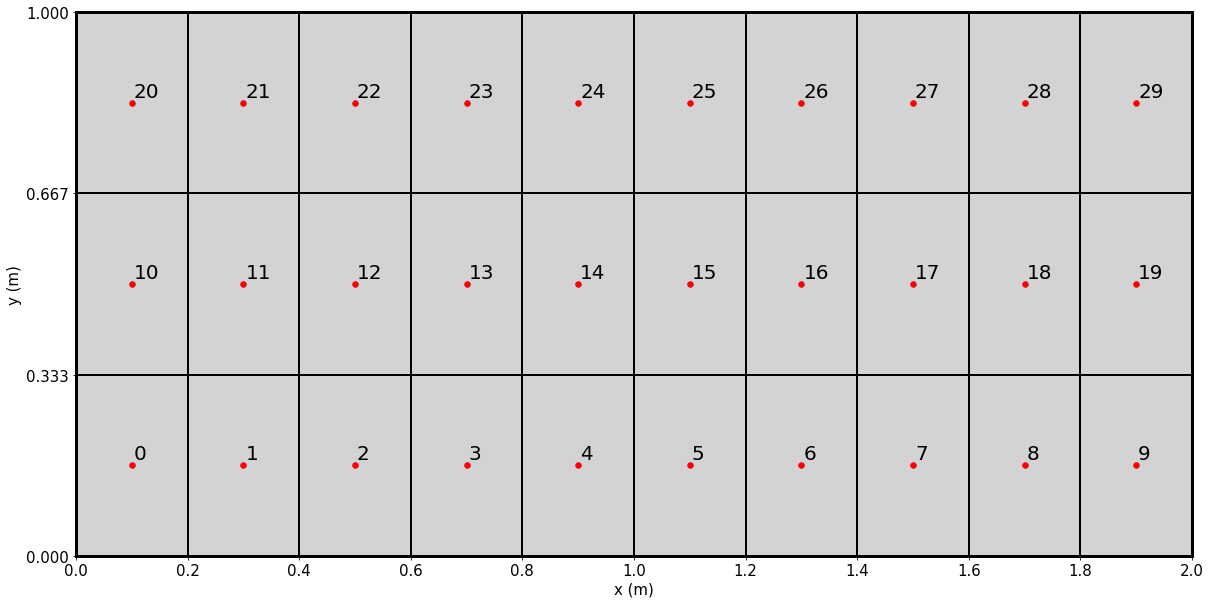

In [ ]:
from functions.Background_Functions import *

nx = 10
ny = 3

visualise_mesh(2, 1, nx, ny)

# P (example value of 12)
k = 12

# N
N = k + nx  
# S
S = k - nx 
# E
E = k + 1  
# W
W = k - 1   

In [ ]:
print("For cell P: " + str(k))
print("N: " + str(N))
print("S: " + str(S))
print("E: " + str(E))
print("W: " + str(W))

For cell P: 11
N: 21
S: 1
E: 12
W: 10


**NOTE:** This is only true for internal cells. Cells adjacent to the bottom boundary will not have a south term, for example.

Within the matrix array <code>U</code> the postiion of each stencil control volume will be as follows:

$$
\begin{bmatrix}
u_S, v_S \\ \vdots \\ u_W, v_W \\ u_P, v_P \\ u_E, v_E \\ \vdots \\ u_N, v_N
\end{bmatrix}_x
\begin{matrix}
\scriptstyle k - \textrm{n}_x \\ \vdots \\\scriptstyle k - 1 \\\scriptstyle k \\\scriptstyle k + 1 \\ \vdots \\\scriptstyle k + \textrm{n}_x
\end{matrix}
$$


Taking a closer look at the $u$ component only and rearranging the matrix contains the $a$ values:

$$
% \begin{bmatrix}
% a_P & - a_N & - a_S & -a_E & - a_W
% \end{bmatrix}
% \begin{bmatrix}
% u_P \\ u_N \\ u_S \\ u_E \\ u_W
% \end{bmatrix}
% \rightarrow
\begin{align*}
\begin{matrix}
\scriptstyle k - \textrm{n}_x & \scriptstyle \dots & \scriptstyle k - 1 & \scriptstyle k & \scriptstyle k + 1 & \scriptstyle  \dots & \scriptstyle k + \textrm{n}_x
\end{matrix} & \\
\begin{bmatrix}
a_S & \dots & a_W & a_P & a_E & \dots & a_N
\end{bmatrix}_x
 &
\begin{bmatrix}
u_S \\ \vdots \\ u_W \\ u_P \\ u_E \\ \vdots \\ u_N
\end{bmatrix}_x
\begin{matrix}
\scriptstyle k - \textrm{n}_x \\ \vdots \\\scriptstyle k - 1 \\\scriptstyle k \\\scriptstyle k + 1 \\ \vdots \\\scriptstyle k + \textrm{n}_x
\end{matrix}
= b_x
\end{align*}
$$


$$
\begin{bmatrix}
\dots & a_S & \dots & a_W & a_P & a_E & \dots & a_N & \dots & \dots & \dots & \dots & \dots & \dots & \dots & \dots \\
\dots & \dots & a_S & \dots & a_W & a_P & a_E & \dots & a_N & \dots & \dots & \dots & \dots & \dots & \dots & \dots \\
\dots & \dots & \dots & a_S & \dots & a_W & a_P & a_E & \dots & a_N & \dots & \dots & \dots & \dots & \dots & \dots \\
\dots & \dots & \dots & \dots & a_S & \dots & a_W & a_P & a_E & \dots & a_N & \dots & \dots & \dots & \dots & \dots \\
\dots & \dots & \dots & \dots & \dots & a_S & \dots & a_W & a_P & a_E & \dots & a_N & \dots & \dots & \dots & \dots \\
\dots & \dots & \dots & \dots & \dots & \dots & a_S & \dots & a_W & a_P & a_E & \dots & a_N & \dots & \dots & \dots \\
\dots & \dots &\dots & \dots & \dots & \dots & \dots & a_S & \dots & a_W & a_P & a_E & \dots & a_N & \dots & \dots \\
\dots & \dots &\dots &\dots & \dots & \dots & \dots & \dots & a_S & \dots & a_W & a_P & a_E & \dots & a_N & \dots \\
\end{bmatrix}_x
\begin{bmatrix}
\vdots \\ u \\ \vdots \\ u \\ u \\ u \\ u \\ u \\ u \\ u \\ u \\ u \\ u \\ \vdots \\ u \\ \vdots
\end{bmatrix}_x
=
\begin{bmatrix}
\vdots \\ b \\ \vdots \\ b \\ b \\ b \\ b \\ b \\ b \\ b \\ b \\ b \\ b \\ \vdots \\ b \\ \vdots
\end{bmatrix}_x
\begin{matrix}
\vdots \\ \scriptstyle k - \textrm{n}_x \\\scriptstyle \vdots\\ \scriptstyle k -1 \\\scriptstyle k \\\scriptstyle k + 1 \\\scriptstyle k + 2 \\\scriptstyle k + 3 \\\scriptstyle k + 4 \\\scriptstyle k + 5 \\\scriptstyle k + 6 \\\scriptstyle k + 7 \\ \scriptstyle k +8\\\scriptstyle \vdots \\\scriptstyle k + \textrm{n}_x \\\scriptstyle \vdots
\end{matrix}
$$

this example is given in the $x$ direction used to solve $u$. The same procedure will be used for the $y$ direction used to solve $v$.

The final systems we want to solve will be as follows in matrix form for both directions:

$$ \begin{bmatrix} A\end{bmatrix}_x \begin{bmatrix} u\end{bmatrix} = \begin{bmatrix} b\end{bmatrix}_x $$
$$ \begin{bmatrix} A\end{bmatrix}_y \begin{bmatrix} v\end{bmatrix} = \begin{bmatrix} b\end{bmatrix}_y $$


$ \begin{bmatrix} A\end{bmatrix} $ is a $k$ x $k$ matrix, where $k$ is the total number of cell centers in the mesh

$ \begin{bmatrix} u\end{bmatrix} $ and $ \begin{bmatrix} v\end{bmatrix} $ are $k$ x 1 matrices

$ \begin{bmatrix} b \end{bmatrix} $ is a $k$ x 1 matrix

The coding of the $A$ and $b$ matrices will be outlined in the following notebook.


*** 

[<svg style="color: rgb(53, 145, 243);" xmlns="http://www.w3.org/2000/svg" width="20" height="20" fill="currentColor" class="bi bi-arrow-left-circle-fill" viewBox="0 0 16 16"> <path d="M8 0a8 8 0 1 0 0 16A8 8 0 0 0 8 0zm3.5 7.5a.5.5 0 0 1 0 1H5.707l2.147 2.146a.5.5 
0 0 1-.708.708l-3-3a.5.5 0 0 1 0-.708l3-3a.5.5 0 1 1 .708.708L5.707 7.5H11.5z" fill="#3591f3"></path> </svg> **Notebook 1** ](https://nbviewer.org/github/scottlevie97/pythonFVSolidMechanics/blob/new-release/lesson_notebooks/_01_Defining_Mesh.ipynb?flush_cache=true)
|
[**Notebook 3** <svg style="color: rgb(53, 145, 243);" xmlns="http://www.w3.org/2000/svg" width="20" height="20" fill="currentColor" class="bi bi-arrow-left-circle-fill" viewBox="0 0 16 16" transform="rotate(180)"> <path d="M8 0a8 8 0 1 0 0 16A8 8 0 0 0 8 0zm3.5 7.5a.5.5 0 0 1 0 1H5.707l2.147 2.146a.5.5 
0 0 1-.708.708l-3-3a.5.5 0 0 1 0-.708l3-3a.5.5 0 1 1 .708.708L5.707 7.5H11.5z" fill="#3591f3"></path> </svg>](https://nbviewer.org/github/scottlevie97/pythonFVSolidMechanics/blob/new-release/lesson_notebooks/_03_Internal_Cells.ipynb?flush_cache=true)

***